In [1]:
import numpy as np

import heapq

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

 

## Make Grid 
### Grid (100 x 100) with start with (1,1) and target (95,95) with step one 
### All these parameters map to Assignment's requirements


In [2]:


first_rows=[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.,0,1, 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1,
       1., 1., 1., 1,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.,0]



first_60_rows = first_rows*60

Second_row_start=[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.,0, 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.,1.,0, 0., 0., 0., 0., 0., 0., 0.,0, 1., 1., 1., 1., 1., 1., 1., 1., 1., 1,1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0]
SECOND_20_rows=Second_row_start*20



legand_row_81=[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.,0., 0., 0., 0., 0., 0., 0., 0.,0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0]

last_raw=[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
last_raws=last_raw*19


my_list=first_60_rows + SECOND_20_rows+legand_row_81 +  last_raws

len(my_list)



new_tar=np.array(my_list)

grid=new_tar.reshape(100,100)

In [3]:
grid=grid.astype(bool)

In [4]:
grid.shape

(100, 100)

In [5]:
start = (1,1)

goal = (95,95)

### We choose Manhattan distance as allowed movements have been restricted to be  angle 90

In [6]:

def heuristic(a, b):
    return (np.abs(b[0] - a[0]) + np.abs(b[1] - a[1]))

In [7]:
 

def astar(array, start, goal):

    adjacents = [(0,1),(-1,0),(1,0)]

    close_set = set()

    came_from = {}

    grid_score = {start:0}

    total_score = {start:heuristic(start, goal)}

    open_list = []

    heapq.heappush(open_list, (total_score[start], start))
 

    while open_list:

        current = heapq.heappop(open_list)[1]
       

        if current == goal:

            data = []

            while current in came_from:

                data.append(current)

                current = came_from[current]

            return data

        close_set.add(current)

        for i, j in adjacents:

            neighbor = current[0] + i, current[1] + j

            temporal_score = grid_score[current] + heuristic(current, neighbor)
          

            if 0 <= neighbor[0] < array.shape[0]:

                if 0 <= neighbor[1] < array.shape[1]:                

                    if array[neighbor[0]][neighbor[1]] == 1:

                        continue
                else:
 # array bound y walls

                    continue

            else:
# array bound x walls

                continue
 

            if neighbor in close_set and temporal_score >= grid_score.get(neighbor, 0):

                continue
 

            if  temporal_score < grid_score.get(neighbor, 0) or neighbor not in [i[1]for i in open_list]:

                came_from[neighbor] = current

                grid_score[neighbor] = temporal_score

                total_score[neighbor] = temporal_score + heuristic(neighbor, goal)

                heapq.heappush(open_list, (total_score[neighbor], neighbor))
 

    return False

In [8]:
path = astar(grid, start, goal)

path = path + [start]

path = path[::-1]

print(path)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (2, 39), (3, 39), (4, 39), (5, 39), (6, 39), (7, 39), (8, 39), (9, 39), (10, 39), (11, 39), (12, 39), (13, 39), (14, 39), (15, 39), (16, 39), (17, 39), (18, 39), (19, 39), (20, 39), (21, 39), (22, 39), (23, 39), (24, 39), (25, 39), (26, 39), (27, 39), (28, 39), (29, 39), (30, 39), (31, 39), (32, 39), (33, 39), (34, 39), (35, 39), (36, 39), (37, 39), (38, 39), (39, 39), (40, 39), (41, 39), (42, 39), (43, 39), (44, 39), (45, 39), (46, 39), (47, 39), (48, 39), (49, 39), (50, 39), (51, 39), (52, 39), (53, 39), (54, 39), (55, 39), (56, 39), (57, 39), (58, 39), (59, 39), (60, 39), (61, 39), (62, 39), (63, 39), (64, 39), (65, 39), (66, 39), (67, 39), (68, 

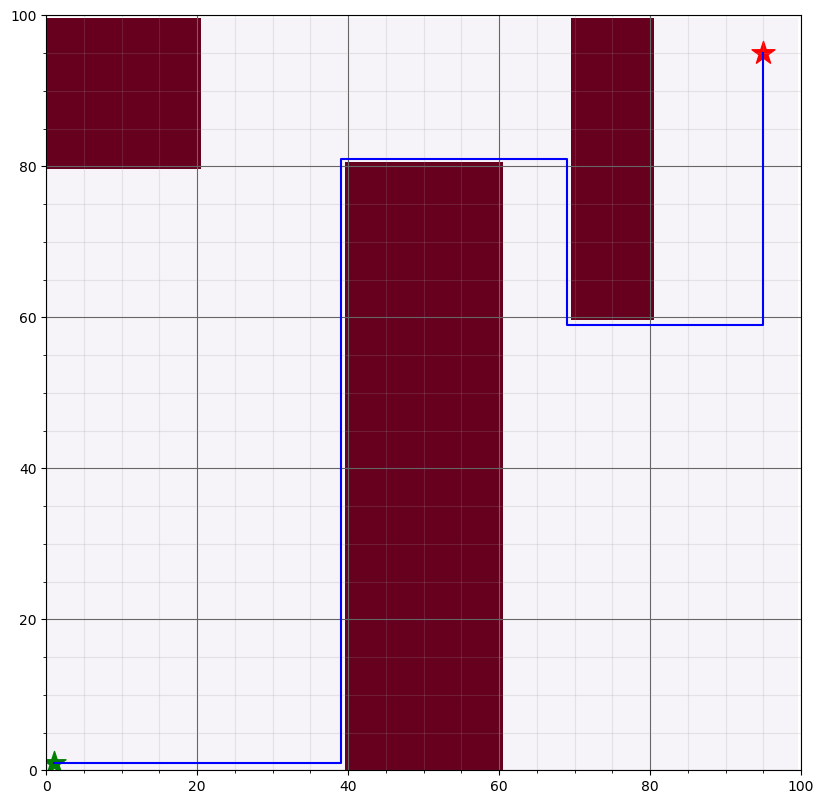

In [10]:

x_ = []

y_= []

for i in (range(0,len(path))):

    x = path[i][0]

    y = path[i][1]

    x_.append(x)

    y_.append(y)

fig, ax = plt.subplots(figsize=(10,10),dpi=100)
ax.grid(True)

ax.imshow(grid, cmap=plt.cm.PuRd )

plt.xlim(0,100)
plt.ylim(0, 100)

plt.minorticks_on()

plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
  


plt.grid(b=True, which='major', color='#666666', linestyle='-')

ax.scatter(start[1],start[0], marker = "*", color = "green", s = 300)

ax.scatter(goal[1],goal[0], marker = "*", color = "red", s = 300)

ax.plot(y_,x_,color='blue')

plt.show()